In [ ]:
%pip install pandas numpy seaborn matplotlib scikit-learn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import ALL the models used in the video
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Visual settings to make charts look nice
sns.set_style('whitegrid')

In [4]:
pd.read_csv("german_credit_data.csv")

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [5]:
df = pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
# 1. Initialize the Encoder (The Translator)
encoder = LabelEncoder()

# 2. List of columns that have text (Categorical data)
text_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

# 3. Loop through them and translate
for col in text_columns:
    df[col] = encoder.fit_transform(df[col])

print("\n--- Data after Encoding (Translation) ---")
print(df.head())


--- Data after Encoding (Translation) ---
   Unnamed: 0  Age  Sex  Job  Housing  Saving accounts  Checking account  \
0           0   67    1    2        1                4                 0   
1           1   22    0    2        1                0                 1   
2           2   49    1    1        1                0                 3   
3           3   45    1    2        0                0                 0   
4           4   53    1    2        0                0                 0   

   Credit amount  Duration  Purpose  Risk  
0           1169         6        5     1  
1           5951        48        5     0  
2           2096        12        3     1  
3           7882        42        4     1  
4           4870        24        1     0  


C:\Users\HP\AppData\Local\Temp\ipykernel_25032\4220111967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk', data=df, palette='coolwarm')


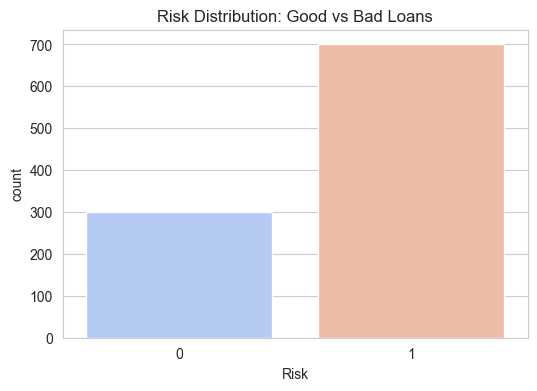

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Risk', data=df, palette='coolwarm')
plt.title('Risk Distribution: Good vs Bad Loans')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_25032\2602959962.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk', y='Credit amount', data=df, palette='coolwarm', ax=ax[1])
C:\Users\HP\AppData\Local\Temp\ipykernel_25032\2602959962.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk', y='Duration', data=df, palette='coolwarm', ax=ax[2])


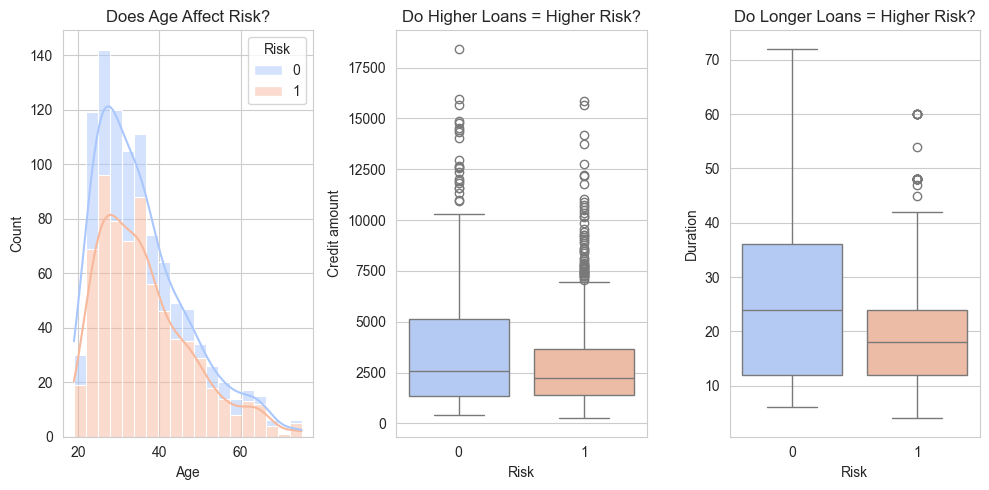

In [8]:
# PLOT 2: Numerical Distributions (Money & Time)
# ==========================================
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

# A. Age vs Risk
sns.histplot(data=df, x='Age', hue='Risk', multiple='stack', kde=True, palette='coolwarm', ax=ax[0])
ax[0].set_title('Does Age Affect Risk?')

# B. Credit Amount vs Risk
sns.boxplot(x='Risk', y='Credit amount', data=df, palette='coolwarm', ax=ax[1])
ax[1].set_title('Do Higher Loans = Higher Risk?')

# C. Duration vs Risk
sns.boxplot(x='Risk', y='Duration', data=df, palette='coolwarm', ax=ax[2])
ax[2].set_title('Do Longer Loans = Higher Risk?')

plt.tight_layout()
plt.show()

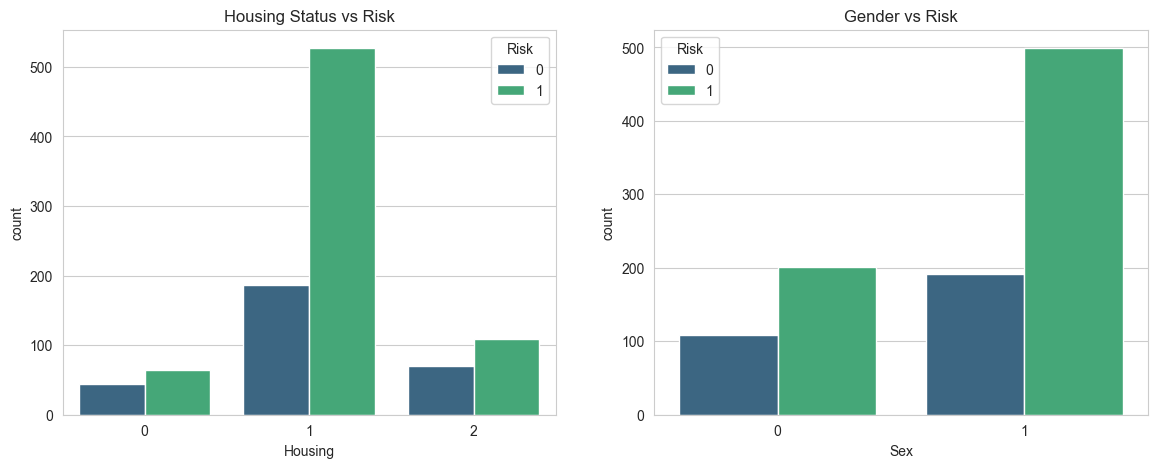

In [9]:
# PLOT 3: Categorical Analysis (Demographics)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# A. Housing vs Risk
sns.countplot(x='Housing', hue='Risk', data=df, palette='viridis', ax=ax[0])
ax[0].set_title('Housing Status vs Risk')

# B. Sex vs Risk
sns.countplot(x='Sex', hue='Risk', data=df, palette='viridis', ax=ax[1])
ax[1].set_title('Gender vs Risk')

plt.show()

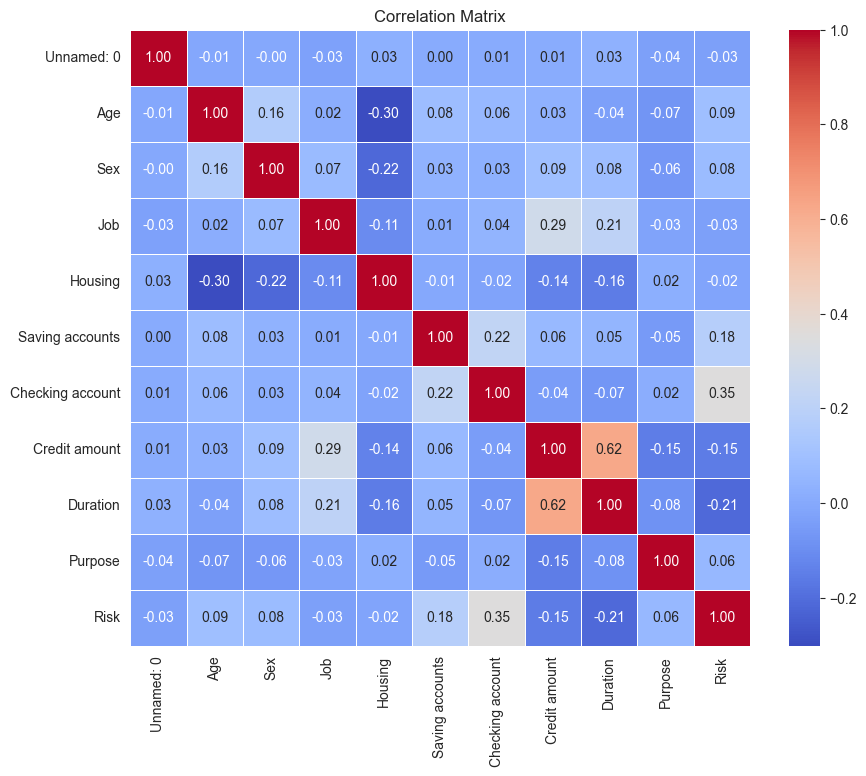

In [10]:
df_corr = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = le.fit_transform(df_corr[col])

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# X = The Features (Drop the answer column 'Risk')
X = df.drop('Risk', axis=1)

# y = The Target (Only the answer column)
y = df['Risk']

# Split: 80% Training, 20% Testing
# random_state=42 locks the randomness so we get the same result every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (800, 10)
Testing Data Shape: (200, 10)


In [16]:
# 1. Define the list of models we want to test
# We put them in a list so we can loop through them easily
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    random_state=42,
    class_weight='balanced'  # <--- THIS IS THE MAGIC FIX
)),
    ("Extra Trees", ExtraTreesClassifier(n_estimators=100, random_state=42))
]

print("--- Training and Comparing Models ---\n")

# 2. The Loop: Train -> Predict -> Print Score for EACH model
best_model_name = ""
best_accuracy = 0

for name, model in models:
    # A. Train (Fit)
    model.fit(X_train, y_train)
    
    # B. Predict
    y_pred = model.predict(X_test)
    
    # C. Evaluate
    acc = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {acc*100:.2f}%")
    
    # Save the winner
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name

print(f"\n🏆 The Winner is: {best_model_name} with {best_accuracy*100:.2f}% Accuracy")

--- Training and Comparing Models ---



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 76.00%
Decision Tree Accuracy: 64.50%
Random Forest Accuracy: 75.50%
Extra Trees Accuracy: 71.50%

🏆 The Winner is: Logistic Regression with 76.00% Accuracy


In [17]:
from sklearn.model_selection import GridSearchCV

# 1. Define the model we want to tune (The Winner)
rf = RandomForestClassifier(random_state=42)

# 2. Define the "Grid" of settings to test
# We are testing 2 x 2 x 2 = 8 different combinations
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [None, 10, 20],         # How deep the tree can grow
    'min_samples_split': [2, 5]          # Minimum samples to allow a split
}

# 3. Run the Search
# cv=5 means "Cross Validation": It splits data 5 different ways to be sure.
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

print("--- Tuning Random Forest (This might take a second) ---")
grid_search.fit(X_train, y_train)

# 4. Get the Best Results
print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Best Accuracy from Tuning: {grid_search.best_score_ * 100:.2f}%")

# 5. Save the best model into a variable
best_model = grid_search.best_estimator_

--- Tuning Random Forest (This might take a second) ---
Best Parameters Found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy from Tuning: 74.63%


In [18]:
# Use the best model found by GridSearch
tuned_model = grid_search.best_estimator_

# Predict on the SAME Test Set as before
y_pred_tuned = tuned_model.predict(X_test)

# Calculate accuracy
tuned_acc = accuracy_score(y_test, y_pred_tuned)

print(f"Baseline Random Forest Accuracy: 76.50% (Previous)")
print(f"Tuned Random Forest Accuracy:    {tuned_acc * 100:.2f}%")

Baseline Random Forest Accuracy: 76.50% (Previous)
Tuned Random Forest Accuracy:    76.00%


In [19]:
import joblib

# Save the trained model to a file named 'financial_risk_model.pkl'
joblib.dump(model, 'financial_risk_model.pkl')

print("✅ Model saved successfully!")

✅ Model saved successfully!
